# Image Processing

## Authors
B.W. Holwerda

## Learning Goals
* reading in an image
* image manipulation
* image vizualization
* Smoothing
* Interpolation
* Source Detection

## Keywords
Image rendering, manipulation, smoothing, interpolation, sub-images

## Companion Content


## Summary
Images are quintessential data, often containing a lot of information. Key is to process them such that information is retained but reduced to the essentials. 

<hr>


## Student Name and ID:



## Date:

<hr>

## Image manipulation

Image are numpy arrays. And so we can manipulate them in a very similar way. Much information is typically hidden in images so it may be necessary to iterate between manipulations and vizualization. Numpy and matplotlib make this pretty straighforward. 

## The Hubble Deep Field. 

Our example image is the Hubble Deep Field (see https://www.spacetelescope.org/science/deep_fields/)
This first Deep Field, the Hubble Deep Field North (HDF-N), was observed over 10 consecutive days during Christmas 1995. The resulting image consisted of 342 separate exposures, with a total exposure time of more than 100 hours, compared with typical Hubble exposures of a few hours. The observed region of sky in Ursa Major was carefully selected to be as empty as possible so that Hubble would look far beyond the stars of our own Milky Way and out past nearby galaxies.

The results were astonishing! Almost 3000 galaxies were seen in the image. Scientists analysed the image statistically and found that the HDF had seen back to the very young Universe where the bulk of the galaxies had not, as yet, had time to form stars. Or, as the popular press dramatically reported, “Hubble sees back to Big Bang”. These very remote galaxies also seemed to be smaller and more irregular than those nearer to us. This was taken as a clear indication that galaxies form by gravitational coalescence of smaller parts.

The image was converted to a png. We'll read it in here


In [1]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

# reading in the Hubble Deep Field
img = mpimg.imread('HDF.png')


## Show the image

We use matplotlib's imshow to inspect images. 

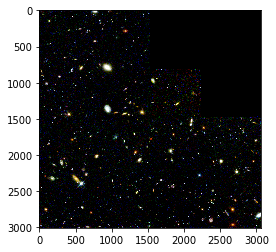

In [2]:
imgplot = plt.imshow(img)


### Exercise 1 - Images are numpy arrays.

img is a numpy array. What are the dimensions of this array? What do these correspond to?

In [14]:
# student work here


## Slice the image

We will now slice the RGB image. Let's grab the first layer.

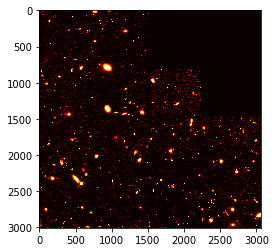

In [15]:
lum_img = img[:, :, 0]
plt.imshow(lum_img, cmap="hot")

### Exercise 2 - image scale

This is the red channel for our image. But what is the scale? Add a colorbar to get an idea of the scale. 

In [5]:
# student work here


### Exercise 3 - histogram

Make a histogram of this image. One can make a single array from a multi-dimensional numpy array with the ravel() function. 

In [6]:
# student work here


### Exercise 4 -  Extreme Values

What are the extreme value in the histogram. What do they correspond to?

 *your answer here*

## Zooming in

There are a lot of galaxies in this image. Let us just focus on two. This generates a thumbnail of two of these galaxies. 

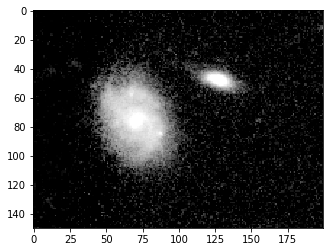

In [7]:
two_galaxies = lum_img[900:1050,1500:1700]
plt.imshow(two_galaxies, cmap=plt.cm.gray)

### Exercise 5 - Interpolation

imshow has a series of interpolation function (bilinear, bicubic, nearest etc.)

Compare them and note the differences. Which one of these smooth the image and which do not?

In [16]:
# student work here


*your answer here*

## Rotating images

rotating the image around the center of the image.

In [17]:
from scipy import ndimage
rotated_galaxies = ndimage.rotate(two_galaxies, 45)

### Exercise 6 - Show the rotated image


In [18]:
# student work here


## Smoothing the subimage

The subimage can be smoothed using a Gaussian filter using the ndimage function gaussian_filter.

In [19]:
blurred_galaxies = ndimage.gaussian_filter(two_galaxies, sigma=3)

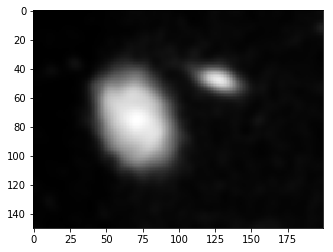

In [20]:
plt.imshow(blurred_galaxies,cmap=plt.cm.gray)

### Exercise 7 - Histograms of subimage and smoothed subimage

ravel both original and blurred images. Make a histogram showing both.

What do you notice in the histogram?

In [21]:
# student work here


*your answer here*

### Exercise 8 - Source Detection

A smoothed image suppresses the instrument noise and thus elevates the signal-to-noise of sources or objects in the image. We can use the smoothed image to detect sources and delineate source and background pixels.

Make a deep copy of the subimage using numpy copy.
Then set in this image a limit based on the smoothed image where backgroun pixels are 0 and source pixels are 1. Show the background/source image.

In [22]:
# student work here


### Median Filter

Unlike a Gaussian smooth of the image, one can also take the median of a subset of pixels. 

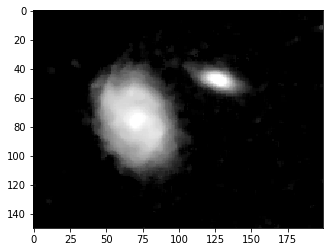

In [23]:
median_galaxies = ndimage.median_filter(two_galaxies, 5)
plt.imshow(median_galaxies,cmap=plt.cm.gray)

## Edge-detection

Another trick in image manipulation is edge detection. ndimage.sobel can do that along the x- or y-axis.
The hypot combines both edge-detections into a single edge-map.

In [24]:
sx = ndimage.sobel(two_galaxies, axis=0, mode='constant')
sy = ndimage.sobel(two_galaxies, axis=1, mode='constant')
sob = np.hypot(sx, sy)

### Exercise 9 - edge-detection

Plot the x-axis and y-axis edge-detection images. What do you notice?

*your answer here*

### Exercise 10 - Edge detection 

Plot the edge-detection combination image. What stands out and what does not?

*your answer here*

### Exercise 11 - Edge-detection and smoothing

Now do the edge detection with the blurred image. Are there clear edges? What can you say about the noise in the image?

In [25]:
# student work


### Exercise 12 - Source Detection

Which of the methods (Gaussian blur and threshold, median smoothing or edge-detection) would allow one to identify clear sources in an image?
Motivate your choice. 

*your answer here*